In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import pynapple as nap

from spatial_manifolds.toroidal import *
from spatial_manifolds.mlencoding import *
from spatial_manifolds.behaviour_plots import *
from spatial_manifolds.detect_grids import *
from spatial_manifolds.brainrender_helper import *

import warnings
warnings.filterwarnings('ignore')
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [22]:
# Parameters
bin_size = 0.01  # 10 ms per bin
duration = 1800  # 10 seconds
firing_rate = 10  # 10 spikes per second

# Number of bins
num_bins = int(duration / bin_size)

# Generate spike train A using a Poisson process
spike_train_A = np.random.poisson(firing_rate * bin_size, num_bins)

# Generate spike train B with causal influence from spike train A
spike_train_B = np.zeros(num_bins)
for i in range(1, num_bins):
    # Spike train B has a base firing rate plus influence from spike train A
    spike_train_B[i] = np.random.poisson(firing_rate * bin_size + spike_train_A[i-1] * 0.1)

# Optional: convert spike_train_B to integers if needed
spike_train_B = spike_train_B.astype(int)

spike_train_C = np.random.poisson(firing_rate * bin_size, num_bins)


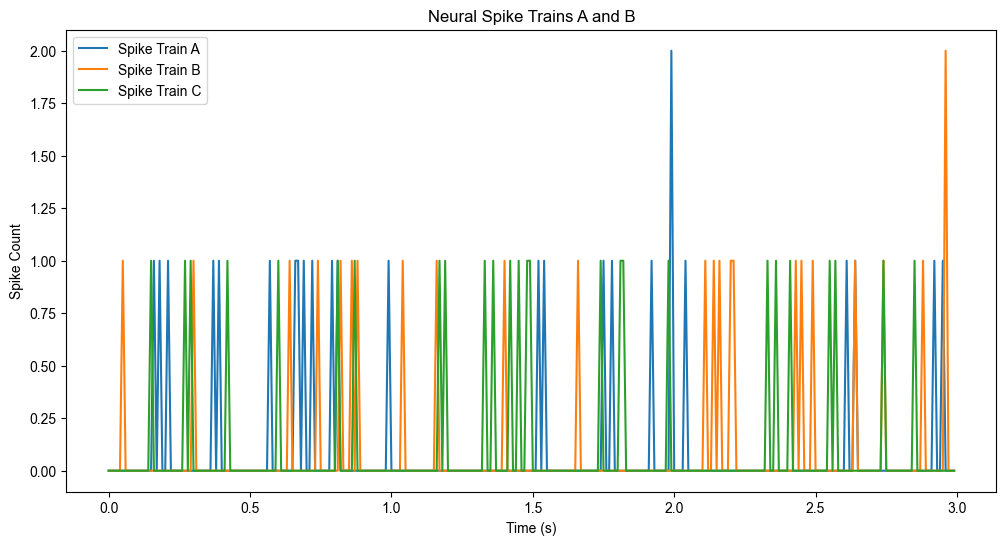

In [3]:
start = 0
end = 300
# Plot the spike trains
time_bins = np.arange(0, duration, bin_size)
plt.figure(figsize=(12, 6))
plt.plot(time_bins[start:end], spike_train_A[start:end], label='Spike Train A')
plt.plot(time_bins[start:end], spike_train_B[start:end], label='Spike Train B')
plt.plot(time_bins[start:end], spike_train_C[start:end], label='Spike Train C')

plt.xlabel('Time (s)')
plt.ylabel('Spike Count')
plt.title('Neural Spike Trains A and B')
plt.legend()
plt.show()


In [4]:
nbins_history = np.append(np.append(np.array([5,6,7,8,9,10]), np.arange(10,100,20)), np.arange(100,501, 100))

In [5]:
pR2s_A_from_B = []
for nbins in nbins_history:
    xgb_history = MLencoding(tunemodel = 'xgboost', cov_history = True, spike_history=False, 
                             window = time_bs, n_filters = 5, max_time = int(time_bs*nbins))
    Y_hat, pR2_cv = xgb_history.fit_cv(spike_train_B, spike_train_A, verbose = 0, continuous_folds = True)
    pR2s_A_from_B.append(np.nanmean(pR2_cv))

pR2s_B_from_A = []
for nbins in nbins_history:
    xgb_history = MLencoding(tunemodel = 'xgboost', cov_history = True, spike_history=False, 
                             window = time_bs, n_filters = 5, max_time = int(time_bs*nbins))
    Y_hat, pR2_cv = xgb_history.fit_cv(spike_train_A, spike_train_B, verbose = 0, continuous_folds = True)
    pR2s_B_from_A.append(np.nanmean(pR2_cv))

pR2s_A_from_C = []
for nbins in nbins_history:
    xgb_history = MLencoding(tunemodel = 'xgboost', cov_history = True, spike_history=False, 
                             window = time_bs, n_filters = 5, max_time = int(time_bs*nbins))
    Y_hat, pR2_cv = xgb_history.fit_cv(spike_train_C, spike_train_A, verbose = 0, continuous_folds = True)
    pR2s_A_from_C.append(np.nanmean(pR2_cv))

pR2s_B_from_C = []
for nbins in nbins_history:
    xgb_history = MLencoding(tunemodel = 'xgboost', cov_history = True, spike_history=False, 
                             window = time_bs, n_filters = 5, max_time = int(time_bs*nbins))
    Y_hat, pR2_cv = xgb_history.fit_cv(spike_train_C, spike_train_B, verbose = 0, continuous_folds = True)
    pR2s_B_from_C.append(np.nanmean(pR2_cv))

pR2s_C_from_A = []
for nbins in nbins_history:
    xgb_history = MLencoding(tunemodel = 'xgboost', cov_history = True, spike_history=False, 
                             window = time_bs, n_filters = 5, max_time = int(time_bs*nbins))
    Y_hat, pR2_cv = xgb_history.fit_cv(spike_train_A, spike_train_C, verbose = 0, continuous_folds = True)
    pR2s_C_from_A.append(np.nanmean(pR2_cv))

pR2s_C_from_B = []
for nbins in nbins_history:
    xgb_history = MLencoding(tunemodel = 'xgboost', cov_history = True, spike_history=False, 
                             window = time_bs, n_filters = 5, max_time = int(time_bs*nbins))
    Y_hat, pR2_cv = xgb_history.fit_cv(spike_train_B, spike_train_C, verbose = 0, continuous_folds = True)
    pR2s_C_from_B.append(np.nanmean(pR2_cv))


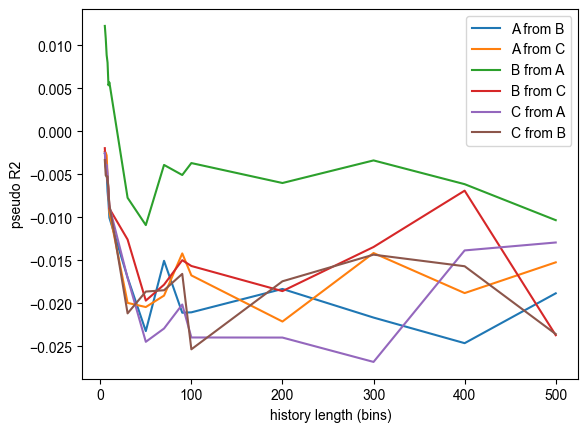

In [6]:
plt.plot(nbins_history, pR2s_A_from_B, label='A from B')
plt.plot(nbins_history, pR2s_A_from_C, label='A from C')
plt.plot(nbins_history, pR2s_B_from_A, label='B from A')
plt.plot(nbins_history, pR2s_B_from_C, label='B from C')
plt.plot(nbins_history, pR2s_C_from_A, label='C from A')
plt.plot(nbins_history, pR2s_C_from_B, label='C from B')
plt.xlabel('history length (bins)')
plt.ylabel('pseudo R2')
plt.legend()
plt.show()

we can see that using a short history can dissociate the causal relationship between spike train A and spike train B

Now we will test to see how the result can vary with different seeds

In [ ]:
seeds = np.arange(0,50)

pR2s_A_from_B = []
for seed in seeds:
    xgb_history = MLencoding(tunemodel = 'xgboost', cov_history = True, spike_history=False,
                             window = time_bs, n_filters = 5, max_time = int(time_bs*5), random_state=seed)
    Y_hat, pR2_cv = xgb_history.fit_cv(spike_train_B, spike_train_A, verbose = 0, continuous_folds = True)
    pR2s_A_from_B.append(np.nanmean(pR2_cv))

pR2s_B_from_A = []
for seed in seeds:
    xgb_history = MLencoding(tunemodel = 'xgboost', cov_history = True, spike_history=False, 
                             window = time_bs, n_filters = 5, max_time = int(time_bs*5), random_state=seed)
    Y_hat, pR2_cv = xgb_history.fit_cv(spike_train_A, spike_train_B, verbose = 0, continuous_folds = True)
    pR2s_B_from_A.append(np.nanmean(pR2_cv))

plt.hist(pR2s_A_from_B, bins=40, range=(-0.2, 0.2), label='A from B', alpha=0.3)
plt.hist(pR2s_B_from_A, bins=40, range=(-0.2, 0.2), label='B from A', alpha=0.3)
plt.legend()
plt.show()

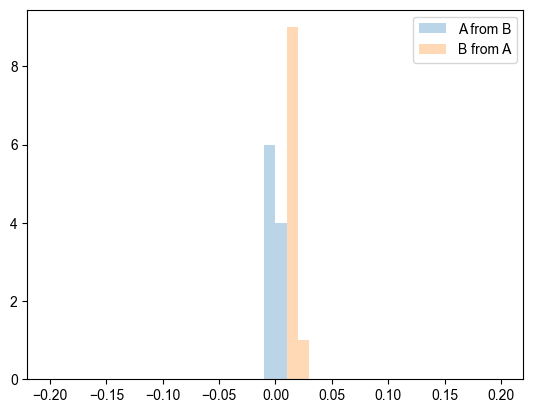

1.4184339133277207e-08


: 

In [ ]:
seed = 1
xgb_history = MLencoding(tunemodel = 'xgboost', cov_history = True, spike_history=False,
                        window = time_bs, n_filters = 5, max_time = int(time_bs*5), random_state=seed)
Y_hat, pR2s_A_from_B = xgb_history.fit_cv(spike_train_B, spike_train_A, verbose = 0, continuous_folds = True)

xgb_history = MLencoding(tunemodel = 'xgboost', cov_history = True, spike_history=False,
                        window = time_bs, n_filters = 5, max_time = int(time_bs*5), random_state=seed)
Y_hat, pR2s_B_from_A = xgb_history.fit_cv(spike_train_A, spike_train_B, verbose = 0, continuous_folds = True)

plt.hist(pR2s_A_from_B, bins=40, range=(-0.2, 0.2), label='A from B', alpha=0.3)
plt.hist(pR2s_B_from_A, bins=40, range=(-0.2, 0.2), label='B from A', alpha=0.3)
plt.legend()
plt.show()

t_statistic, p_value = stats.ttest_rel(pR2s_A_from_B, pR2s_B_from_A)
print(p_value)
